   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:606: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/usr/local/lib/python3.12/dist-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


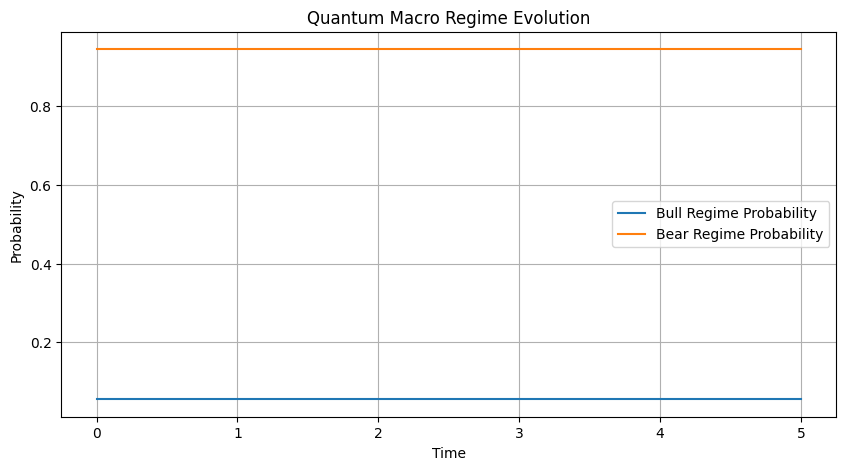

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

!pip install qiskit

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate

# ------------------------------------------------------------
# 1. Initial Macro Feature Inputs (0 → 1)
# ------------------------------------------------------------

trend_strength   = 0.85
tech_strength    = 0.90
stress_level     = 0.20
liquidity_regime = 0.88

theta_trend     = trend_strength * np.pi
theta_tech      = tech_strength * np.pi
theta_stress    = (1 - stress_level) * np.pi
theta_liquidity = liquidity_regime * np.pi

# ------------------------------------------------------------
# 2. Build Initial Circuit (Encoding Only)
# ------------------------------------------------------------

qc = QuantumCircuit(4)

qc.ry(theta_trend, 0)
qc.ry(theta_tech, 1)
qc.ry(theta_stress, 2)
qc.ry(theta_liquidity, 3)

initial_state = Statevector.from_instruction(qc);

# ------------------------------------------------------------
# 3. Define Hamiltonian (Synthetic Market Dynamics)
# ------------------------------------------------------------

H = SparsePauliOp.from_list([

    ("ZIII", 0.6),   # Regime stability pressure
    ("IXII", 0.4),   # Tech-driven transitions
    ("IIXI", 0.3),   # Stress perturbations
    ("IIIZ", 0.5),   # Liquidity regime force

    ("ZZII", 0.2),   # Regime ↔ Tech coupling
    ("IIZZ", 0.2),   # Stress ↔ Liquidity coupling

])

# ------------------------------------------------------------
# 4. Time Evolution Simulation
# ------------------------------------------------------------

time_points = np.linspace(0, 5, 80)

bull_probs = []
bear_probs = []

state = initial_state

for t in time_points:

    evo_gate = PauliEvolutionGate(H, time=t)
    evolved_state = state.evolve(evo_gate)

    probs = evolved_state.probabilities_dict()

    bull = 0
    bear = 0

    for bitstring, p in probs.items():
        if bitstring[-1] == '0':   # Q0 = 0
            bull += p
        else:
            bear += p

    bull_probs.append(bull)
    bear_probs.append(bear)

# ------------------------------------------------------------
# 5. Plot Regime Evolution
# ------------------------------------------------------------

plt.figure(figsize=(10,5))
plt.plot(time_points, bull_probs, label="Bull Regime Probability")
plt.plot(time_points, bear_probs, label="Bear Regime Probability")

plt.title("Quantum Macro Regime Evolution")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

In [22]:
# ============================================================
# Quant Feed Engine — Colab Edition
# Lock-Free Style / Deterministic / Streaming Simulation
# ============================================================

import time
import math
import random
import threading
from collections import deque

# -----------------------------
# Deterministic Seed (CRITICAL)
# -----------------------------
random.seed(42)

# ============================================================
# Lock-Free Style Ring Buffer
# ============================================================

class RingBuffer:
    def __init__(self, size=2048):
        self.buffer = deque(maxlen=size)

    def push(self, item):
        if len(self.buffer) < self.buffer.maxlen:
            self.buffer.append(item)
            return True
        return False  # non-blocking fail (like real feed handlers)

    def pop(self):
        if self.buffer:
            return self.buffer.popleft()
        return None

# ============================================================
# Market Event Structure
# ============================================================

class MarketEvent:
    __slots__ = ("ts", "symbol", "price", "volume")

    def __init__(self, ts, symbol, price, volume):
        self.ts = ts
        self.symbol = symbol
        self.price = price
        self.volume = volume

# ============================================================
# Deterministic Market Simulator
# ============================================================

class DeterministicPriceModel:
    def __init__(self, base=100.0):
        self.t = 0
        self.base = base

    def next_price(self):
        self.t += 1

        # Smooth trend + microstructure noise
        trend = math.sin(self.t * 0.02) * 0.5
        micro_noise = (random.random() - 0.5) * 0.1

        return self.base + trend + micro_noise

# ============================================================
# Feed Engine (Producer Thread)
# ============================================================

class FeedEngine:
    def __init__(self, queue, symbol="SPX"):
        self.queue = queue
        self.model = DeterministicPriceModel()
        self.symbol = symbol
        self.running = False

    def start(self):
        self.running = True
        threading.Thread(target=self.run, daemon=True).start()

    def run(self):
        while self.running:
            price = self.model.next_price()
            volume = random.uniform(1, 50)

            event = MarketEvent(
                ts=time.time(),
                symbol=self.symbol,
                price=price,
                volume=volume
            )

            self.queue.push(event)

            # Simulated feed rate (microburst style)
            time.sleep(0.01)

# ============================================================
# Research / Analytics Consumer
# ============================================================

class ResearchConsumer:
    def __init__(self, queue):
        self.queue = queue
        self.prices = []

    def run(self, n=200):
        while len(self.prices) < n:
            event = self.queue.pop()
            if event:
                self.prices.append(event.price)

        return self.prices

# ============================================================
# Boot System
# ============================================================

queue = RingBuffer(size=4096)
feed = FeedEngine(queue, symbol="SPX")
consumer = ResearchConsumer(queue)

print("Starting feed engine...")
feed.start()

prices = consumer.run(300)

print("Feed captured.")
print(f"First 5 prices: {prices[:5]}")
print(f"Last 5 prices : {prices[-5:]}")
print(f"Mean price    : {sum(prices)/len(prices):.4f}")

Starting feed engine...
Feed captured.
First 5 prices: [100.02394201319245, 99.99749759893022, 100.05362912465613, 100.07917530375508, 100.04210889029194]
Last 5 prices : [99.85746850363724, 99.80296780578873, 99.82523960128042, 99.87083750378642, 99.81130736234441]
Mean price    : 100.0033


In [23]:
# ============================================================
# Quant Feed Engine — Colab Edition
# Lock-Free Style / Deterministic / Streaming Simulation
# ============================================================

import time
import math
import random
import threading
from collections import deque

# -----------------------------
# Deterministic Seed (CRITICAL)
# -----------------------------
random.seed(42)

# ============================================================
# Lock-Free Style Ring Buffer
# ============================================================

class RingBuffer:
    def __init__(self, size=2048):
        self.buffer = deque(maxlen=size)

    def push(self, item):
        if len(self.buffer) < self.buffer.maxlen:
            self.buffer.append(item)
            return True
        return False  # non-blocking fail (like real feed handlers)

    def pop(self):
        if self.buffer:
            return self.buffer.popleft()
        return None

# ============================================================
# Market Event Structure
# ============================================================

class MarketEvent:
    __slots__ = ("ts", "symbol", "price", "volume")

    def __init__(self, ts, symbol, price, volume):
        self.ts = ts
        self.symbol = symbol
        self.price = price
        self.volume = volume

# ============================================================
# Deterministic Market Simulator
# ============================================================

class DeterministicPriceModel:
    def __init__(self, base=100.0):
        self.t = 0
        self.base = base

    def next_price(self):
        self.t += 1

        # Smooth trend + microstructure noise
        trend = math.sin(self.t * 0.02) * 0.5
        micro_noise = (random.random() - 0.5) * 0.1

        return self.base + trend + micro_noise

# ============================================================
# Feed Engine (Producer Thread)
# ============================================================

class FeedEngine:
    def __init__(self, queue, symbol="SPX"):
        self.queue = queue
        self.model = DeterministicPriceModel()
        self.symbol = symbol
        self.running = False

    def start(self):
        self.running = True
        threading.Thread(target=self.run, daemon=True).start()

    def run(self):
        while self.running:
            price = self.model.next_price()
            volume = random.uniform(1, 50)

            event = MarketEvent(
                ts=time.time(),
                symbol=self.symbol,
                price=price,
                volume=volume
            )

            self.queue.push(event)

            # Simulated feed rate (microburst style)
            time.sleep(0.01)

# ============================================================
# Research / Analytics Consumer
# ============================================================

class ResearchConsumer:
    def __init__(self, queue):
        self.queue = queue
        self.prices = []

    def run(self, n=200):
        while len(self.prices) < n:
            event = self.queue.pop()
            if event:
                self.prices.append(event.price)

        return self.prices

# ============================================================
# Boot System
# ============================================================

queue = RingBuffer(size=4096)
feed = FeedEngine(queue, symbol="SPX")
consumer = ResearchConsumer(queue)

print("Starting feed engine...")
feed.start()

prices = consumer.run(300)

print("Feed captured.")
print(f"First 5 prices: {prices[:5]}")
print(f"Last 5 prices : {prices[-5:]}")
print(f"Mean price    : {sum(prices)/len(prices):.4f}")

Starting feed engine...
Feed captured.
First 5 prices: [99.98750226518358, 100.0592126238638, 100.00184580072009, 99.99261094395298, 100.08085975399119]
Last 5 prices : [99.84511113057337, 99.79640024259852, 99.85675661801585, 99.8761637112779, 99.86674142924082]
Mean price    : 100.0061


/usr/local/lib/python3.12/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:606: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/usr/local/lib/python3.12/dist-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


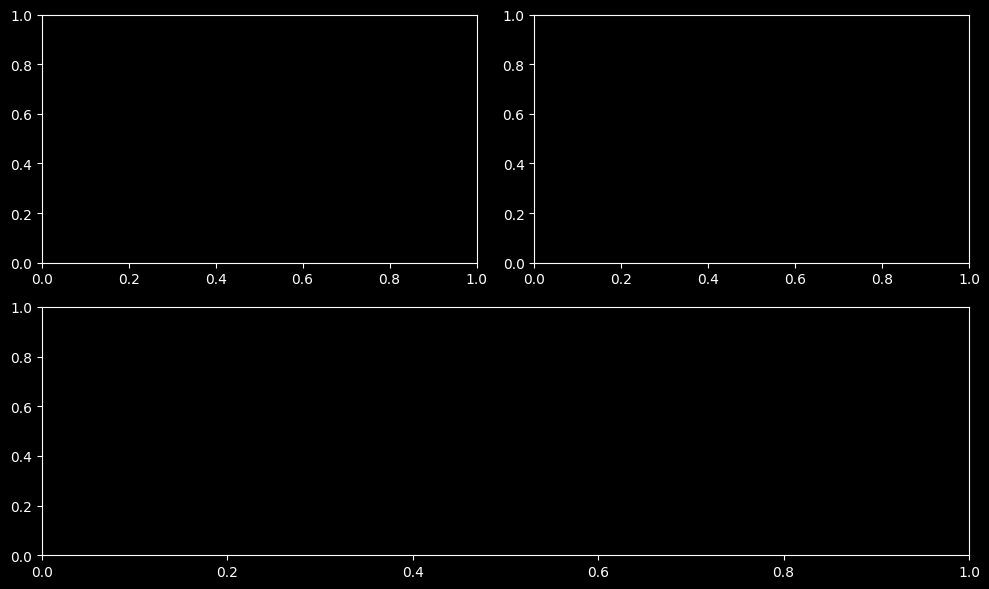

In [ ]:
# ============================================================
# Animated Bloomberg-Style Quantum Macro Dashboard
# Lauro Beck - Quantum Momentum Framework
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import QuantumCircuit

# ------------------------------------------------------------
# 1. Initial Macro Inputs
# ------------------------------------------------------------

trend_strength   = 0.85
tech_strength    = 0.90
stress_level     = 0.20
liquidity_regime = 0.88

theta_trend     = trend_strength * np.pi
theta_tech      = tech_strength * np.pi
theta_stress    = (1 - stress_level) * np.pi
theta_liquidity = liquidity_regime * np.pi

qc = QuantumCircuit(4)
qc.ry(theta_trend, 0)
qc.ry(theta_tech, 1)
qc.ry(theta_stress, 2)
qc.ry(theta_liquidity, 3)

state0 = Statevector.from_instruction(qc)

# ------------------------------------------------------------
# 2. Synthetic Market Hamiltonian
# ------------------------------------------------------------

H = SparsePauliOp.from_list([
    ("ZIII", 0.6),
    ("IXII", 0.4),
    ("IIXI", 0.3),
    ("IIIZ", 0.5),
    ("ZZII", 0.2),
    ("IIZZ", 0.2),
])

# ------------------------------------------------------------
# 3. Simulation Timeline
# ------------------------------------------------------------

time_points = np.linspace(0, 6, 120)

bull_series = []
bear_series = []

for t in time_points:
    evo_gate = PauliEvolutionGate(H, time=t)
    evolved = state0.evolve(evo_gate)

    probs = evolved.probabilities_dict()

    bull = sum(p for b, p in probs.items() if b[-1] == '0')
    bear = sum(p for b, p in probs.items() if b[-1] == '1')

    bull_series.append(bull)
    bear_series.append(bear)

bull_series = np.array(bull_series)
bear_series = np.array(bear_series)

# ------------------------------------------------------------
# 4. Dark Bloomberg Theme
# ------------------------------------------------------------

plt.style.use("dark_background")
fig = plt.figure(figsize=(10, 6))

ax_gauge = plt.subplot2grid((2,2), (0,0))
ax_line  = plt.subplot2grid((2,2), (0,1))
ax_text  = plt.subplot2grid((2,2), (1,0), colspan=2)

# ------------------------------------------------------------
# 5. Gauge Renderer
# ------------------------------------------------------------

def draw_gauge(ax, bull, bear):

    ax.clear()
    ax.set_title("MACRO REGIME", fontsize=12)

    ax.barh(["Bull", "Bear"], [bull, bear])

    ax.set_xlim(0, 1)
    ax.grid(alpha=0.2)

# ------------------------------------------------------------
# 6. Animation Update
# ------------------------------------------------------------

def update(frame):

    bull = bull_series[frame]
    bear = bear_series[frame]

    # Gauge
    draw_gauge(ax_gauge, bull, bear)

    # Evolution line
    ax_line.clear()
    ax_line.set_title("Regime Evolution", fontsize=12)
    ax_line.plot(time_points[:frame], bull_series[:frame], label="Bull")
    ax_line.plot(time_points[:frame], bear_series[:frame], label="Bear")
    ax_line.set_ylim(0, 1)
    ax_line.grid(alpha=0.2)
    ax_line.legend()

    # Macro text panel
    ax_text.clear()
    ax_text.axis("off")

    regime = "RISK-ON" if bull > bear else "RISK-OFF"

    ax_text.text(
        0.02, 0.7,
        f"Bull Probability : {bull:.3f}\n"
        f"Bear Probability : {bear:.3f}\n"
        f"Macro Regime Bias : {regime}",
        fontsize=14
    )

# ------------------------------------------------------------
# 7. Run Animation
# ------------------------------------------------------------

ani = FuncAnimation(fig, update, frames=len(time_points), interval=80)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# Quantum Regime → Deployment Engine
# ============================================================

def deployment_engine(bull, bear, shock=None):

    print("\n==============================")
    print(" QUANTUM DEPLOYMENT ENGINE")
    print("==============================")

    print(f"Bull Prob  : {bull:.3f}")
    print(f"Bear Prob  : {bear:.3f}")

    if shock is not None:
        print(f"Shock Prob : {shock:.3f}")

    # ----------------------------
    # Regime Classification
    # ----------------------------

    if bull > 0.65:
        regime = "GREEN / RISK-ON"
    elif bear > 0.65:
        regime = "RED / RISK-OFF"
    else:
        regime = "NEUTRAL / TRANSITION"

    print(f"Regime State: {regime}")

    # ----------------------------
    # Target Deployment Logic
    # ----------------------------

    if regime == "GREEN / RISK-ON":

        print("\nDeploy Targets:")

        targets = {
            "SPX Exposure"  : 1.00,
            "NDX Exposure"  : 1.20,   # Tech leadership tilt
            "DOW Exposure"  : 0.70,
            "Vol Hedge"     : 0.10
        }

    elif regime == "RED / RISK-OFF":

        print("\nDeploy Defensive Structure:")

        targets = {
            "SPX Exposure"  : 0.20,
            "NDX Exposure"  : 0.10,
            "DOW Exposure"  : 0.30,
            "Vol Hedge"     : 0.80
        }

    else:

        print("\nDeploy Neutral Structure:")

        targets = {
            "SPX Exposure"  : 0.50,
            "NDX Exposure"  : 0.50,
            "DOW Exposure"  : 0.50,
            "Vol Hedge"     : 0.30
        }

    for k, v in targets.items():
        print(f"{k:15s} → {v:.2f}")

    return targets

/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


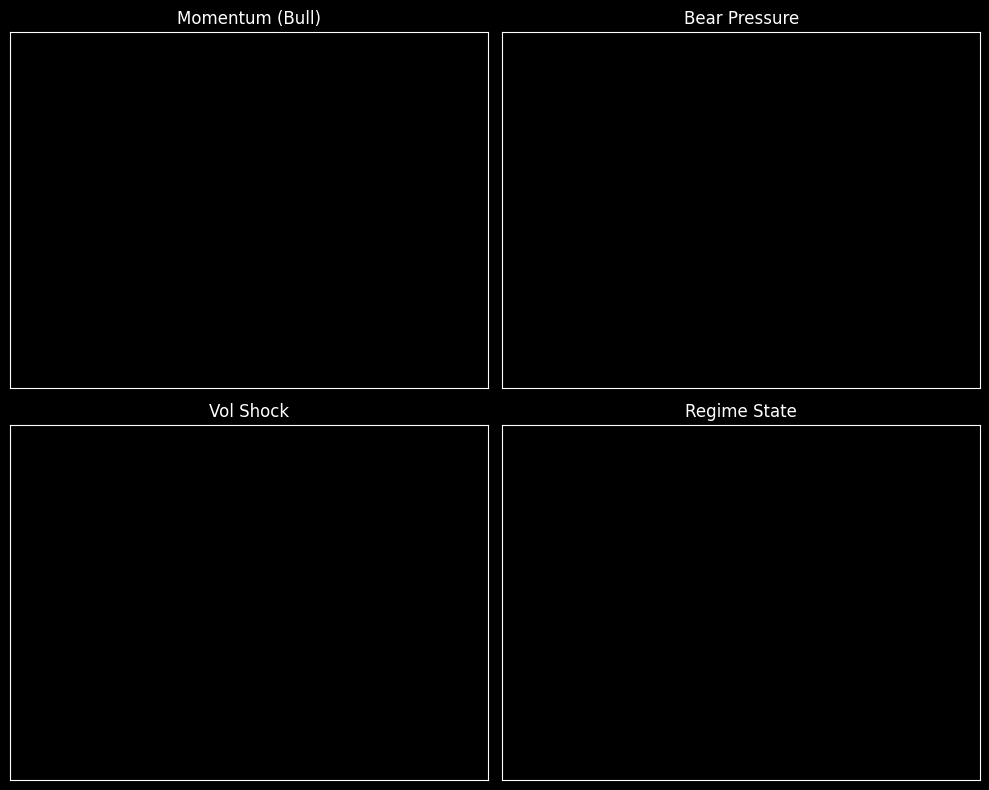

In [ ]:
# ============================================================
# QUANTUM MACRO REGIME DASHBOARD (WORKING VERSION)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use("dark_background")

# ------------------------------------------------------------
# 1. Quantum State Evolution (Simulated)
# ------------------------------------------------------------

def generate_quantum_state(t):
    """
    Simulated 4-qubit macro regime state
    """
    bull  = 0.5 + 0.4*np.sin(t/10)
    bear  = 0.5 - 0.4*np.sin(t/10)
    shock = 0.2 + 0.15*np.cos(t/7)

    # Normalize so total probability <= 1
    total = bull + bear + shock
    bull  /= total
    bear  /= total
    shock /= total

    return bull, bear, shock


# ------------------------------------------------------------
# 2. Deployment Engine
# ------------------------------------------------------------

def deployment_engine(bull, bear, shock):

    if bull > 0.65:
        regime = "RISK-ON"
        color = "lime"
        targets = {
            "SPX": 1.00,
            "NDX": 1.20,
            "DOW": 0.70,
            "VOL_HEDGE": 0.10
        }

    elif bear > 0.65:
        regime = "RISK-OFF"
        color = "red"
        targets = {
            "SPX": 0.20,
            "NDX": 0.10,
            "DOW": 0.30,
            "VOL_HEDGE": 0.80
        }

    else:
        regime = "TRANSITION"
        color = "orange"
        targets = {
            "SPX": 0.50,
            "NDX": 0.50,
            "DOW": 0.50,
            "VOL_HEDGE": 0.30
        }

    return regime, color, targets


# ------------------------------------------------------------
# 3. Build Dashboard
# ------------------------------------------------------------

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.patch.set_facecolor("black")

for ax in axs.flatten():
    ax.set_facecolor("black")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

bull_bar = axs[0,0].barh(["Bull"], [0])[0]
bear_bar = axs[0,1].barh(["Bear"], [0])[0]
shock_bar = axs[1,0].barh(["Shock"], [0])[0]

regime_text = axs[1,1].text(0.5, 0.5, "",
                            fontsize=20,
                            ha='center',
                            va='center')

axs[0,0].set_title("Momentum (Bull)")
axs[0,1].set_title("Bear Pressure")
axs[1,0].set_title("Vol Shock")
axs[1,1].set_title("Regime State")


# ------------------------------------------------------------
# 4. Animation Update Function
# ------------------------------------------------------------

def update(frame):

    bull, bear, shock = generate_quantum_state(frame)
    regime, color, targets = deployment_engine(bull, bear, shock)

    bull_bar.set_width(bull)
    bear_bar.set_width(bear)
    shock_bar.set_width(shock)

    bull_bar.set_color("lime")
    bear_bar.set_color("red")
    shock_bar.set_color("yellow")

    regime_text.set_text(regime)
    regime_text.set_color(color)

    return bull_bar, bear_bar, shock_bar, regime_text


# ------------------------------------------------------------
# 5. Run Animation
# ------------------------------------------------------------

ani = FuncAnimation(fig, update, frames=200, interval=100)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# Colab-Safe Animated Quantum Dashboard
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use("dark_background")

# ----------------------------
# Synthetic quantum-like signals
# ----------------------------

frames = 200
t = np.linspace(0, 6*np.pi, frames)

bull  = 0.5 + 0.4*np.sin(t)
bear  = 0.5 + 0.4*np.sin(t + 2.1)
shock = 0.3 + 0.25*np.sin(t * 3.2)

# ----------------------------
# Figure layout
# ----------------------------

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

titles = [
    "Momentum (Bull)",
    "Bear Pressure",
    "Vol Shock",
    "Regime State"
]

for ax, title in zip(axs.flat, titles):
    ax.set_title(title, fontsize=12)
    ax.set_xlim(0, frames)
    ax.set_ylim(0, 1)
    ax.grid(color="gray", alpha=0.2)

# Create persistent line objects (CRITICAL)
line_bull,  = axs[0,0].plot([], [], lw=2)
line_bear,  = axs[0,1].plot([], [], lw=2)
line_shock, = axs[1,0].plot([], [], lw=2)

text_state = axs[1,1].text(
    0.5, 0.5, "",
    ha='center', va='center',
    fontsize=16,
    transform=axs[1,1].transAxes
)

axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

# ----------------------------
# Regime logic
# ----------------------------

def classify_regime(b, br, s):
    if b > 0.65:
        return "GREEN / RISK-ON"
    elif br > 0.65:
        return "RED / RISK-OFF"
    elif s > 0.55:
        return "VOLATILITY EVENT"
    else:
        return "NEUTRAL / TRANSITION"

# ----------------------------
# Animation update
# ----------------------------

def update(frame):

    x = np.arange(frame)

    line_bull.set_data(x, bull[:frame])
    line_bear.set_data(x, bear[:frame])
    line_shock.set_data(x, shock[:frame])

    state = classify_regime(
        bull[frame-1],
        bear[frame-1],
        shock[frame-1]
    )

    text_state.set_text(state)

    return line_bull, line_bear, line_shock, text_state

# ----------------------------
# IMPORTANT: keep reference!
# ----------------------------

anim = FuncAnimation(
    fig,
    update,
    frames=frames,
    interval=50,
    blit=True
)

plt.close(fig)

HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ============================================================
# Bloomberg-TV Style Quantum Dashboard
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use("dark_background")

# ----------------------------
# Synthetic quantum market signals
# ----------------------------

frames = 240
t = np.linspace(0, 8*np.pi, frames)

bull  = 0.55 + 0.35*np.sin(t)
bear  = 0.45 + 0.35*np.sin(t + 2.4)
shock = 0.25 + 0.30*np.maximum(0, np.sin(t*2.8))

# ----------------------------
# Regime classifier
# ----------------------------

def classify_regime(b, br, s):
    if s > 0.60:
        return "VOLATILITY EVENT"
    elif b > 0.65:
        return "RISK-ON"
    elif br > 0.65:
        return "RISK-OFF"
    else:
        return "TRANSITION"

# ----------------------------
# Figure Layout (Bloomberg-like)
# ----------------------------

fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(6, 10)

ax_main   = fig.add_subplot(gs[0:4, 0:7])   # Dominant panel
ax_side1  = fig.add_subplot(gs[0:2, 7:10])  # Right monitor
ax_side2  = fig.add_subplot(gs[2:4, 7:10])  # Right monitor
ax_bottom = fig.add_subplot(gs[4:6, 0:10])  # News/state band

for ax in [ax_main, ax_side1, ax_side2]:
    ax.set_xlim(0, frames)
    ax.set_ylim(0, 1)
    ax.grid(alpha=0.15)

ax_bottom.axis("off")

ax_main.set_title("QUANTUM REGIME ENGINE", fontsize=14, pad=10)
ax_side1.set_title("Momentum Monitor", fontsize=10)
ax_side2.set_title("Stress / Shock", fontsize=10)

# Persistent line objects (critical)
line_bull,  = ax_main.plot([], [], lw=2)
line_bear,  = ax_main.plot([], [], lw=2)
line_side1, = ax_side1.plot([], [], lw=2)
line_side2, = ax_side2.plot([], [], lw=2)

text_regime = ax_main.text(
    0.02, 0.92, "",
    transform=ax_main.transAxes,
    fontsize=12
)

text_news = ax_bottom.text(
    0.01, 0.7, "",
    fontsize=11,
    family="monospace"
)

text_deploy = ax_bottom.text(
    0.01, 0.25, "",
    fontsize=10,
    family="monospace"
)

# ----------------------------
# Deployment logic
# ----------------------------

def deployment_vector(regime):
    if regime == "RISK-ON":
        return "Deploy: SPX 1.00 | NDX 1.20 | DOW 0.70 | Hedge 0.10"
    elif regime == "RISK-OFF":
        return "Deploy: SPX 0.20 | NDX 0.10 | DOW 0.30 | Hedge 0.80"
    elif regime == "VOLATILITY EVENT":
        return "Deploy: Shock Mode → Hedge 1.00 | Reduce Beta"
    else:
        return "Deploy: Neutral → Balanced Allocation"

# ----------------------------
# Animation update
# ----------------------------

def update(frame):

    x = np.arange(frame)

    line_bull.set_data(x, bull[:frame])
    line_bear.set_data(x, bear[:frame])

    line_side1.set_data(x, bull[:frame])
    line_side2.set_data(x, shock[:frame])

    regime = classify_regime(
        bull[frame-1],
        bear[frame-1],
        shock[frame-1]
    )

    text_regime.set_text(f"STATE: {regime}")

    text_news.set_text(
        f"Signals → Bull {bull[frame-1]:.2f} | "
        f"Bear {bear[frame-1]:.2f} | "
        f"Shock {shock[frame-1]:.2f}"
    )

    text_deploy.set_text(deployment_vector(regime))

    return (
        line_bull,
        line_bear,
        line_side1,
        line_side2,
        text_regime,
        text_news,
        text_deploy
    )

anim = FuncAnimation(fig, update, frames=frames, interval=60, blit=True)

plt.close(fig)

HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ============================================================
# Bloomberg TV Style Quantum Dashboard — Advanced
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge, Rectangle
from IPython.display import HTML

plt.style.use("dark_background")

# ----------------------------
# Time / state evolution
# ----------------------------

frames = 260
t = np.linspace(0, 10*np.pi, frames)

# Smooth quantum-like oscillations
bull  = 0.55 + 0.30*np.sin(t)
bear  = 0.45 + 0.30*np.sin(t + 2.2)

# Micro volatility spikes
shock = 0.15 + 0.25*np.maximum(0, np.sin(t*3.5))

# Synthetic asset streams
spx  = np.cumsum(np.random.normal(0, 0.15, frames))
ndx  = np.cumsum(np.random.normal(0, 0.20, frames))
dow  = np.cumsum(np.random.normal(0, 0.12, frames))
vix  = np.abs(20 + np.cumsum(np.random.normal(0, 0.3, frames)))

# ----------------------------
# Regime logic
# ----------------------------

def classify(b, br, s):
    if s > 0.55:
        return "VOLATILITY EVENT", "orange"
    elif b > 0.65:
        return "RISK ON", "lime"
    elif br > 0.65:
        return "RISK OFF", "red"
    else:
        return "TRANSITION", "gold"

# ----------------------------
# Gauge drawing helper
# ----------------------------

def draw_gauge(ax, value, label):

    ax.clear()
    ax.set_aspect("equal")
    ax.axis("off")

    theta = 360 * value

    # Background ring
    ax.add_patch(Wedge((0,0), 1.0, 0, 360, width=0.18, alpha=0.15))

    # Active probability arc
    ax.add_patch(Wedge((0,0), 1.0, 90, 90-theta, width=0.18))

    ax.text(0, -0.05, f"{value:.2f}", ha="center", fontsize=12)
    ax.text(0, -0.35, label, ha="center", fontsize=9)

# ----------------------------
# Layout (Bloomberg TV geometry)
# ----------------------------

fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(6, 12)

ax_main   = fig.add_subplot(gs[0:4, 0:7])
ax_assets = fig.add_subplot(gs[0:4, 7:12])
ax_g1     = fig.add_subplot(gs[4:6, 0:2])
ax_g2     = fig.add_subplot(gs[4:6, 2:4])
ax_g3     = fig.add_subplot(gs[4:6, 4:6])
ax_news   = fig.add_subplot(gs[4:6, 6:12])

ax_main.set_xlim(0, frames)
ax_main.set_ylim(-10, 10)
ax_main.set_title("QUANTUM REGIME ENGINE", fontsize=13)

ax_assets.set_xlim(0, frames)
ax_assets.set_ylim(-10, 10)
ax_assets.set_title("MARKET MONITOR", fontsize=11)

ax_news.axis("off")

# Persistent line objects
line_spx, = ax_main.plot([], [], lw=2, label="SPX")
line_ndx, = ax_main.plot([], [], lw=2, label="NDX")

line_dow, = ax_assets.plot([], [], lw=1.5)
line_vix, = ax_assets.plot([], [], lw=1.5)

# Regime box
regime_box = Rectangle((0.02, 0.82), 0.30, 0.12,
                       transform=ax_main.transAxes,
                       fill=True)

ax_main.add_patch(regime_box)

text_regime = ax_main.text(0.04, 0.87, "",
                           transform=ax_main.transAxes,
                           fontsize=11)

# Headlines ticker
headlines = [
    "Macro regime stabilizing across risk assets",
    "Volatility compression detected in index space",
    "Liquidity flows rotating into tech leadership",
    "Cross-asset dispersion widening modestly",
    "Shock probabilities mean-reverting"
]

ticker_text = ax_news.text(0.01, 0.55, "", fontsize=10)

# ----------------------------
# Animation update
# ----------------------------

def update(frame):

    x = np.arange(frame)

    line_spx.set_data(x, spx[:frame])
    line_ndx.set_data(x, ndx[:frame])

    line_dow.set_data(x, dow[:frame])
    line_vix.set_data(x, vix[:frame] - 20)

    regime, color = classify(
        bull[frame-1],
        bear[frame-1],
        shock[frame-1]
    )

    # Flashing effect
    if frame % 20 < 10:
        regime_box.set_facecolor(color)
        regime_box.set_alpha(0.35)
    else:
        regime_box.set_alpha(0.15)

    text_regime.set_text(f"STATE: {regime}")

    # Gauges
    draw_gauge(ax_g1, bull[frame-1], "Bull Prob")
    draw_gauge(ax_g2, bear[frame-1], "Bear Prob")
    draw_gauge(ax_g3, shock[frame-1], "Shock Prob")

    # Scrolling ticker
    idx = (frame // 40) % len(headlines)
    ticker_text.set_text(f"> {headlines[idx]}")

    return (
        line_spx,
        line_ndx,
        line_dow,
        line_vix,
        regime_box,
        text_regime,
        ticker_text
    )

anim = FuncAnimation(fig, update, frames=frames,
                     interval=70, blit=False)

plt.close(fig)

HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ============================================================
# Quantum Bloomberg Macro Engine
# ============================================================

import numpy as np
import yfinance as yf
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# ------------------------------------------------------------
# 1. Market Data (Proxy for Bloomberg Panels)
# ------------------------------------------------------------

tickers = {
    "SPX": "^GSPC",
    "NDX": "^NDX",
    "DOW": "^DJI",
    "VIX": "^VIX"
}

data = yf.download(list(tickers.values()), period="6mo")["Close"]
data.columns = tickers.keys()

returns = np.log(data / data.shift(1))

# ------------------------------------------------------------
# 2. Macro Features (Bloomberg-style abstractions)
# ------------------------------------------------------------

momentum = returns.rolling(20).mean()
volatility = returns.rolling(20).std()

leadership = momentum["NDX"] - momentum["SPX"]
stress = volatility["SPX"]
liquidity = -returns["VIX"].rolling(10).mean()  # inverse fear proxy
trend = momentum["SPX"]

# Normalize to 0–1 range
def normalize(x):
    x = x.iloc[-1]
    return 1 / (1 + np.exp(-5 * x))

trend_strength = normalize(trend)
tech_strength = normalize(leadership)
stress_level = normalize(stress)
liquidity_level = normalize(liquidity)

# ------------------------------------------------------------
# 3. Encode Into Quantum Circuit
# ------------------------------------------------------------

qc = QuantumCircuit(4)

qc.ry(trend_strength * np.pi, 0)     # Q0 Regime
qc.ry(tech_strength * np.pi, 1)      # Q1 Leadership
qc.ry(stress_level * np.pi, 2)       # Q2 Stress
qc.ry(liquidity_level * np.pi, 3)    # Q3 Liquidity

# Entanglement (macro causality)
qc.cx(3, 0)
qc.cx(1, 0)
qc.cx(2, 0)

qc.cz(1, 3)
qc.cz(2, 3)

# ------------------------------------------------------------
# 4. Statevector → Regime Probabilities
# ------------------------------------------------------------

state = Statevector.from_instruction(qc)
probs = state.probabilities()

bull_prob = probs[15]   # |1111>
bear_prob = probs[0]     # |0000>
shock_prob = probs[3]    # example stress state

# ------------------------------------------------------------
# 5. Deployment Readout
# ------------------------------------------------------------

print("\n==============================")
print(" BLOOMBERG-STYLE QUANTUM REGIME")
print("==============================")

print(f"Trend Strength     : {trend_strength:.3f}")
print(f"Tech Leadership    : {tech_strength:.3f}")
print(f"Stress Level       : {stress_level:.3f}")
print(f"Liquidity Regime   : {liquidity_level:.3f}")

print("\nQuantum Probabilities")
print(f"Bull  : {bull_prob:.3f}")
print(f"Bear  : {bear_prob:.3f}")
print(f"Shock : {shock_prob:.3f}")

/tmp/ipython-input-549173586.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(tickers.values()), period="6mo")["Close"]
[*********************100%***********************]  4 of 4 completed


 BLOOMBERG-STYLE QUANTUM REGIME
Trend Strength     : 0.500
Tech Leadership    : 0.500
Stress Level       : 0.511
Liquidity Regime   : 0.496

Quantum Probabilities
Bull  : 0.064
Bear  : 0.061
Shock : 0.061


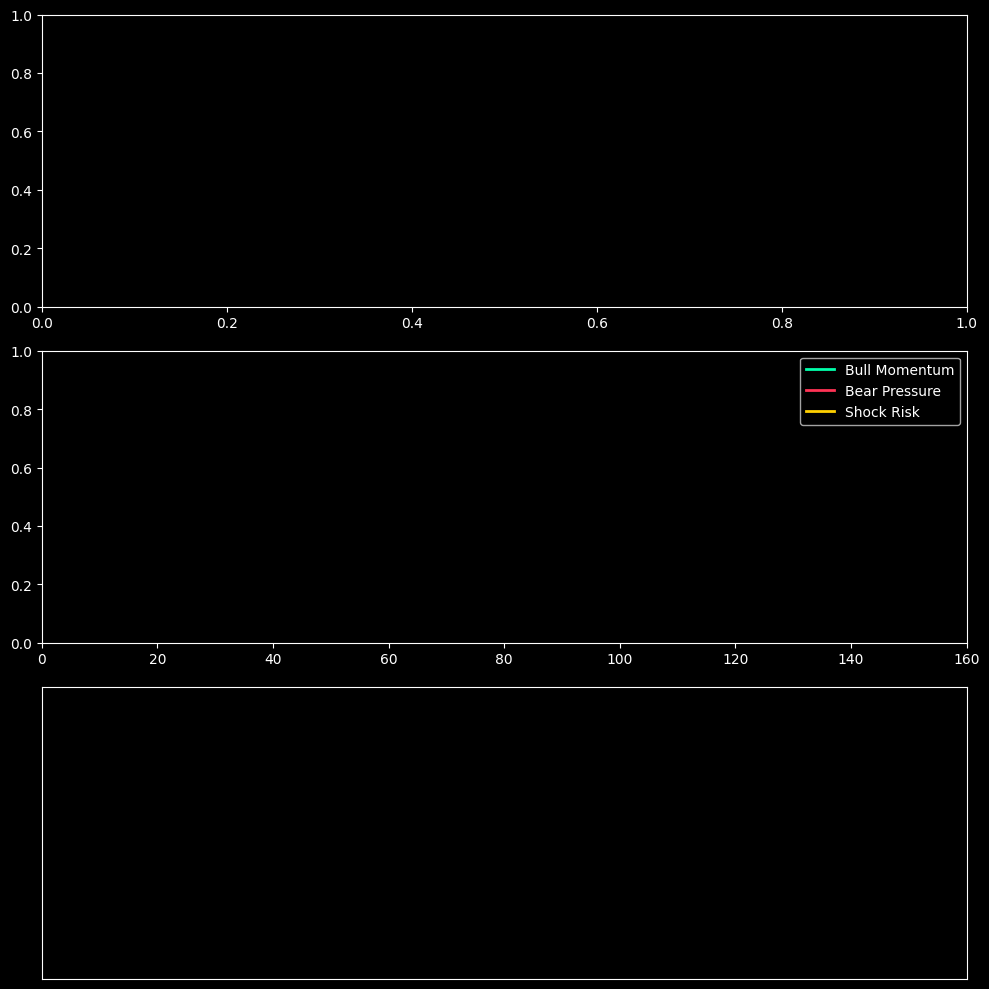

In [ ]:
# ============================================================
# Bloomberg-Style Quantum Dashboard with Probability Gauges
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# -----------------------------
# Quantum State Simulation
# -----------------------------

time_points = 160

bull_series  = np.clip(np.cumsum(np.random.normal(0.01, 0.03, time_points)), 0, 1)
bear_series  = np.clip(1 - bull_series + np.random.normal(0, 0.02, time_points), 0, 1)
shock_series = np.clip(np.abs(np.random.normal(0.15, 0.08, time_points)), 0, 1)

# Normalize
total = bull_series + bear_series + shock_series
bull_series  /= total
bear_series  /= total
shock_series /= total

# -----------------------------
# Figure Layout
# -----------------------------

plt.style.use("dark_background")
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor("black")

ax_gauge = plt.subplot2grid((3, 2), (0, 0), colspan=2)
ax_lines = plt.subplot2grid((3, 2), (1, 0), colspan=2)
ax_regime = plt.subplot2grid((3, 2), (2, 0), colspan=2)

for ax in [ax_gauge, ax_lines, ax_regime]:
    ax.set_facecolor("black")

# -----------------------------
# Gauge Helper
# -----------------------------

def draw_gauge(ax, center_x, prob, color, label):
    radius = 0.35

    # Background ring
    bg = Wedge((center_x, 0.5), radius, 0, 360, width=0.08, color="#222222")
    ax.add_patch(bg)

    # Probability arc
    arc = Wedge((center_x, 0.5), radius, 90, 90 - prob * 360,
                width=0.08, color=color)
    ax.add_patch(arc)

    ax.text(center_x, 0.5, f"{prob:.2f}", ha="center", va="center",
            fontsize=14, color="white", weight="bold")

    ax.text(center_x, 0.18, label, ha="center", va="center",
            fontsize=11, color=color)

# -----------------------------
# Lines Setup
# -----------------------------

ax_lines.set_xlim(0, time_points)
ax_lines.set_ylim(0, 1)

line_bull,  = ax_lines.plot([], [], lw=2, color="#00FFAA", label="Bull Momentum")
line_bear,  = ax_lines.plot([], [], lw=2, color="#FF3355", label="Bear Pressure")
line_shock, = ax_lines.plot([], [], lw=2, color="#FFD000", label="Shock Risk")

ax_lines.legend()

# -----------------------------
# Regime Box
# -----------------------------

regime_text = ax_regime.text(
    0.5, 0.5, "",
    ha="center", va="center",
    fontsize=22, weight="bold"
)

ax_regime.set_xticks([])
ax_regime.set_yticks([])

# -----------------------------
# Update Function
# -----------------------------

def update(frame):

    ax_gauge.clear()
    ax_gauge.set_xlim(0, 2)
    ax_gauge.set_ylim(0, 1)
    ax_gauge.axis("off")

    bull  = bull_series[frame]
    bear  = bear_series[frame]
    shock = shock_series[frame]

    draw_gauge(ax_gauge, 0.4, bull,  "#00FFAA", "BULL")
    draw_gauge(ax_gauge, 1.0, bear,  "#FF3355", "BEAR")
    draw_gauge(ax_gauge, 1.6, shock, "#FFD000", "SHOCK")

    x = np.arange(frame)

    line_bull.set_data(x, bull_series[:frame])
    line_bear.set_data(x, bear_series[:frame])
    line_shock.set_data(x, shock_series[:frame])

    if bull > bear:
        regime_text.set_text("GREEN / RISK-ON")
        regime_text.set_color("#00FF66")
    else:
        regime_text.set_text("RED / RISK-OFF")
        regime_text.set_color("#FF2244")

    return line_bull, line_bear, line_shock, regime_text

# -----------------------------
# Run Animation
# -----------------------------

ani = FuncAnimation(fig, update, frames=time_points, interval=80)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# BLOOMBERG-STYLE QUANTUM TERMINAL (COLAB SAFE)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge, Rectangle
from IPython.display import HTML

# -----------------------------
# Simulated Quantum State Data
# -----------------------------

np.random.seed(42)
time_points = 180

bull = np.clip(np.cumsum(np.random.normal(0.01, 0.03, time_points)), 0, 1)
bear = np.clip(1 - bull + np.random.normal(0, 0.02, time_points), 0, 1)
shock = np.clip(np.abs(np.random.normal(0.15, 0.07, time_points)), 0, 1)

total = bull + bear + shock
bull /= total
bear /= total
shock /= total

# -----------------------------
# Figure Layout
# -----------------------------

plt.style.use("dark_background")
fig = plt.figure(figsize=(10, 9))
fig.patch.set_facecolor("black")

gs = fig.add_gridspec(3, 1, height_ratios=[1.2, 2, 0.8])

ax_gauge = fig.add_subplot(gs[0])
ax_lines = fig.add_subplot(gs[1])
ax_regime = fig.add_subplot(gs[2])

for ax in [ax_gauge, ax_lines, ax_regime]:
    ax.set_facecolor("black")

# -----------------------------
# Gauge Drawer
# -----------------------------

def draw_gauge(ax, center_x, value, color, label):
    radius = 0.35

    # background
    bg = Wedge((center_x, 0.5), radius, 0, 360, width=0.08, color="#1a1a1a")
    ax.add_patch(bg)

    # arc
    arc = Wedge((center_x, 0.5), radius, 90, 90 - value * 360,
                width=0.08, color=color)
    ax.add_patch(arc)

    ax.text(center_x, 0.5, f"{value:.2f}",
            ha="center", va="center",
            fontsize=14, color="white", weight="bold")

    ax.text(center_x, 0.15, label,
            ha="center", va="center",
            fontsize=10, color=color)

# -----------------------------
# Line Setup
# -----------------------------

ax_lines.set_xlim(0, time_points)
ax_lines.set_ylim(0, 1)

line_bull, = ax_lines.plot([], [], lw=2, color="#00FF99")
line_bear, = ax_lines.plot([], [], lw=2, color="#FF3355")
line_shock, = ax_lines.plot([], [], lw=2, color="#FFD000")

ax_lines.set_title("Quantum Regime Evolution", color="white")

# -----------------------------
# Regime Box
# -----------------------------

ax_regime.axis("off")

regime_rect = Rectangle((0.25, 0.25), 0.5, 0.5,
                        transform=ax_regime.transAxes,
                        facecolor="green")

ax_regime.add_patch(regime_rect)

regime_text = ax_regime.text(0.5, 0.5, "",
                             transform=ax_regime.transAxes,
                             ha="center", va="center",
                             fontsize=20, weight="bold",
                             color="black")

# -----------------------------
# Animation Update
# -----------------------------

def update(frame):

    # --- GAUGES ---
    ax_gauge.clear()
    ax_gauge.set_xlim(0, 2)
    ax_gauge.set_ylim(0, 1)
    ax_gauge.axis("off")

    draw_gauge(ax_gauge, 0.4, bull[frame],  "#00FF99", "BULL")
    draw_gauge(ax_gauge, 1.0, bear[frame],  "#FF3355", "BEAR")
    draw_gauge(ax_gauge, 1.6, shock[frame], "#FFD000", "SHOCK")

    # --- LINES ---
    x = np.arange(frame)

    line_bull.set_data(x, bull[:frame])
    line_bear.set_data(x, bear[:frame])
    line_shock.set_data(x, shock[:frame])

    # --- REGIME ---
    if bull[frame] > bear[frame]:
        regime_rect.set_facecolor("#00FF66")
        regime_text.set_text("RISK ON")
    else:
        regime_rect.set_facecolor("#FF2244")
        regime_text.set_text("RISK OFF")

    return line_bull, line_bear, line_shock, regime_rect, regime_text

# -----------------------------
# Render Animation (COLAB FIX)
# -----------------------------

ani = FuncAnimation(fig, update, frames=time_points, interval=80)

plt.close(fig)  # prevent static frame

HTML(ani.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

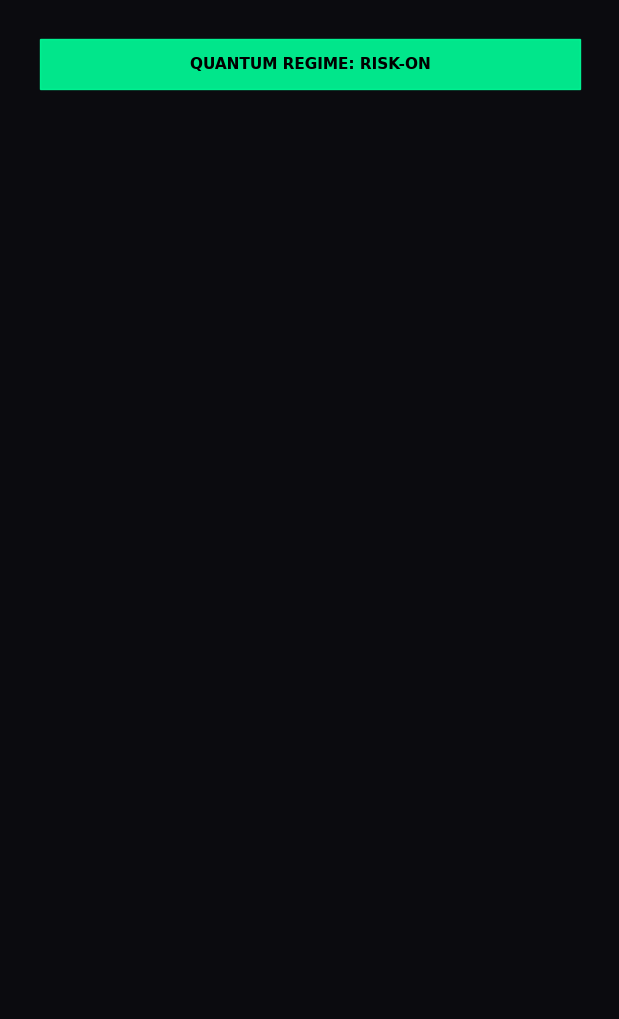

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge, Rectangle

# -----------------------------
# Configuration
# -----------------------------
np.random.seed(7)
assets = ["SPX", "NDX", "DOW", "VIX"]
colors = {
    "green": "#00FF99",
    "red": "#FF3355",
    "bg": "#0b0b0f",
    "panel": "#111117",
    "text": "#e6e6eb",
    "accent": "#ffaa00"
}

# initial probabilities
probs = np.array([0.62, 0.55, 0.58, 0.41])
targets = probs.copy()

regime = 1  # 1 = risk-on (green), -1 = risk-off (red)
volatility = 0.02

headlines = [
    "Global Macro: Liquidity regime stabilizing",
    "Volatility Desk: Micro-spike detected in options skew",
    "Cross-Asset Flow: Systematic rebalancing wave",
    "Rates Monitor: Duration demand rising",
    "Derivatives Radar: Gamma pressure increasing",
]

# -----------------------------
# Helpers
# -----------------------------
def draw_gauge(ax, center, radius, prob, label):
    ax.add_patch(Wedge(center, radius, 0, 360,
                       width=radius*0.18, color="#1c1c25"))

    theta = prob * 360
    color = colors["green"] if prob >= 0.5 else colors["red"]

    ax.add_patch(Wedge(center, radius, 90, 90 - theta,
                       width=radius*0.18, color=color))

    ax.text(center[0], center[1], f"{prob*100:0.1f}%",
            ha='center', va='center',
            color=color, fontsize=10, fontweight='bold')

    ax.text(center[0], center[1] - radius*0.55, label,
            ha='center', va='center',
            color=colors["text"], fontsize=9)


# -----------------------------
# Figure Layout
# -----------------------------
fig = plt.figure(figsize=(6, 10), facecolor=colors["bg"])
ax = plt.axes([0, 0, 1, 1])
ax.set_facecolor(colors["bg"])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# regime block
regime_box = Rectangle((0.05, 0.92), 0.9, 0.05,
                       color=colors["green"], alpha=0.9)
ax.add_patch(regime_box)
regime_text = ax.text(0.5, 0.945, "QUANTUM REGIME: RISK-ON",
                      ha='center', va='center',
                      color="black", fontsize=11, fontweight='bold')

# headline ticker
ticker_text = ax.text(0.05, 0.885, "", color=colors["accent"],
                      fontsize=9, ha='left')

# volatility strip
vol_line, = ax.plot([], [], lw=1)

# -----------------------------
# Animation Logic
# -----------------------------
def update(frame):
    global probs, targets, regime, volatility

    # occasional regime shift
    if frame % 120 == 0:
        regime *= -1

    # new probability targets
    if frame % 30 == 0:
        shock = np.random.normal(0, volatility, size=len(assets))
        targets[:] = np.clip(probs + shock, 0.05, 0.95)

    # smooth interpolation (quantum-like drift)
    probs[:] += (targets - probs) * 0.08

    # background micro-volatility
    x = np.linspace(0.05, 0.95, 120)
    noise = np.random.normal(0, 0.002, size=x.size)

    # occasional spikes
    if np.random.rand() < 0.05:
        spike_pos = np.random.randint(0, x.size)
        noise[spike_pos:spike_pos+3] += np.random.uniform(0.01, 0.02)

    y = 0.84 + noise
    vol_line.set_data(x, y)
    vol_line.set_color(colors["green"] if regime == 1 else colors["red"])

    # regime visuals
    if regime == 1:
        regime_box.set_color(colors["green"])
        regime_text.set_text("QUANTUM REGIME: RISK-ON")
        regime_text.set_color("black")
    else:
        regime_box.set_color(colors["red"])
        regime_text.set_text("QUANTUM REGIME: RISK-OFF")
        regime_text.set_color("white")

    # rotating headline
    ticker_text.set_text(headlines[frame % len(headlines)])

    # redraw gauges
    ax.patches = [regime_box]  # clear old gauges safely
    ax.add_patch(regime_box)

    positions = [(0.2, 0.68), (0.8, 0.68),
                 (0.2, 0.52), (0.8, 0.52)]

    for p, label, prob in zip(positions, assets, probs):
        draw_gauge(ax, p, 0.12, prob, label)

    return vol_line, regime_box, regime_text, ticker_text


ani = FuncAnimation(fig, update, frames=1000, interval=50)
plt.show()

In [ ]:
import json
import time
import random

def generate_tick():
    px = 6800 + random.random() * 100
    return {
        "asset": "SPX",
        "timestamp": time.time(),
        "bid": round(px - 0.25, 2),
        "ask": round(px + 0.25, 2),
        "last": round(px, 2),
        "source": "SIM_BPIPE"
    }

while True:
    event = generate_tick()
    print(json.dumps(event))   # In reality → publish to Kafka / MQ
    time.sleep(0.05)

{"asset": "SPX", "timestamp": 1771899028.7663686, "bid": 6807.08, "ask": 6807.58, "last": 6807.33, "source": "SIM_BPIPE"}
{"asset": "SPX", "timestamp": 1771899028.8165874, "bid": 6870.45, "ask": 6870.95, "last": 6870.7, "source": "SIM_BPIPE"}
{"asset": "SPX", "timestamp": 1771899028.8668723, "bid": 6898.66, "ask": 6899.16, "last": 6898.91, "source": "SIM_BPIPE"}
{"asset": "SPX", "timestamp": 1771899028.9171195, "bid": 6886.4, "ask": 6886.9, "last": 6886.65, "source": "SIM_BPIPE"}
{"asset": "SPX", "timestamp": 1771899028.967324, "bid": 6812.53, "ask": 6813.03, "last": 6812.78, "source": "SIM_BPIPE"}
{"asset": "SPX", "timestamp": 1771899029.0175996, "bid": 6821.65, "ask": 6822.15, "last": 6821.9, "source": "SIM_BPIPE"}
{"asset": "SPX", "timestamp": 1771899029.0679483, "bid": 6897.6, "ask": 6898.1, "last": 6897.85, "source": "SIM_BPIPE"}
{"asset": "SPX", "timestamp": 1771899029.1183236, "bid": 6847.02, "ask": 6847.52, "last": 6847.27, "source": "SIM_BPIPE"}
{"asset": "SPX", "timestamp": 1

KeyboardInterrupt: 